# ATX-DAT-2 | Codealong and Lab 13 | Answer Key

# Codealong - Text Processing with scikit-learn

In [14]:
import os
import math
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import feature_extraction, ensemble, cross_validation, metrics

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)


plt.style.use('ggplot')

The data is about sentiments on Amazon reviews.

In [15]:
reviews = []
sentiments = []

with open(os.path.join('..', 'datasets', 'amazon-reviews.txt')) as f:
    for line in f.readlines():
        line = line.strip('\n')
        review, sentiment = line.split('\t')
        sentiment = np.nan if sentiment == '' else int(sentiment)

        reviews.append(review)
        sentiments.append(sentiment)

df = pd.DataFrame({'review': reviews, 'sentiment': sentiments})

In [16]:
df.head()

,review,sentiment
0,I try not to adjust the volume setting to avoi...,NaN
1,So there is no way for me to plug it in here i...,0.0
2,"Good case, Excellent value.",1.0
3,I thought Motorola made reliable products!.,NaN
4,Battery for Motorola Razr.,NaN


In [17]:
df.dropna(inplace = True) # Let's drop the NaN

In [18]:
df.head()

,review,sentiment
1,So there is no way for me to plug it in here i...,0.0
2,"Good case, Excellent value.",1.0
5,Great for the jawbone.,1.0
10,Tied to charger for conversations lasting more...,0.0
11,The mic is great.,1.0


In [19]:
X = df.review
y = df.sentiment

## Train/test sets

In [20]:
train_X, test_X, train_y, test_y = cross_validation.train_test_split(X, y, test_size = 0.4)

In [21]:
train_X

2766                                   Excellent product.
2152    It's very convenient and simple to use - gets ...
2534                                    Poor Reliability.
376                    My headset works just peachy-keen.
2580    I didn't want the clip going over the top of m...
                              ...                        
997               Now I know that I made a wise decision.
2549                           Would recommend this item.
1988                 Talk about USELESS customer service.
1453    The update procedure is difficult and cumbersome.
2225                                 Perfect for the PS3.
Name: review, dtype: object

## `CountVectorizer`

`CountVectorizer` converts a collection of text into a matrix of features.  Each row will be a sample (an article or piece of text) and each column will be a text feature (usually a count or binary feature per word).

`CountVectorizer` takes a column of text and creates a new dataset.  It generates a feature for every word in all of the pieces of text.

CAUTION: Using all of the words can be useful, but we may need to use regularization to avoid overfitting.  Otherwise, rare words may cause the model to overfit and not generalize.

(And check http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html as needed)

In [88]:
# Instantiate a new CountVectorizer

# Stopwords are non-content words.  (e.g. 'to', 'the', and 'it'
# They aren’t helpful for prediction, so we remove them.

vectorizer = feature_extraction.text.CountVectorizer(ngram_range=(1, 2),stop_words = 'english')

In [89]:
vectorizer

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Vectorizers are like other models in scikit-learn:
- We create a vectorizer object with the parameters of our feature space
- We fit a vectorizer to learn the vocabulary
- We transform a set of text into that feature space

Note: there is a distinction between fit and transform:
- We fit from our training set.  This is part of the model building process, so we don't look at our test set
- We transform our test set using our model fit on the training set

In [90]:
# We use `fit` to learn the vocabulary of the reviews

vectorizer.fit(train_X)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [92]:
# The bag-of-words

vectorizer.get_feature_names()

[u'10',
 u'10 minutes',
 u'10 saved',
 u'10 series',
 u'11',
 u'11 months',
 u'12',
 u'12 minutes',
 u'20',
 u'20 left',
 u'2000',
 u'24',
 u'24 hours',
 u'2mp',
 u'2mp pics',
 u'350',
 u'350 headset',
 u'3o',
 u'3o minutes',
 u'42',
 u'42 usb',
 u'45',
 u'45 minutes',
 u'50',
 u'50 cent',
 u'50 drain',
 u'5020',
 u'5020 pretty',
 u'510',
 u'510 maintains',
 u'510 right',
 u'5320',
 u'8125',
 u'8525',
 u'8525 phone',
 u'abhor',
 u'ability',
 u'ability actually',
 u'ability phone',
 u'able',
 u'able roam',
 u'able voice',
 u'abound',
 u'absolutely',
 u'absolutely great',
 u'absolutely loved',
 u'ac',
 u'ac charger',
 u'accept',
 u'accept cassette',
 u'access',
 u'access fine',
 u'accessing',
 u'accessing internet',
 u'accessory',
 u'accessory good',
 u'accompanied',
 u'accompanied software',
 u'according',
 u'according people',
 u'actually',
 u'actually know',
 u'actually outperform',
 u'actually try',
 u'actually turns',
 u'ad',
 u'adapter',
 u'adapter does',
 u'addition',
 u'addition 

In [93]:
# We use `tranform` to generate the sample X word matrix - one column per feature (here, a word)

train_X_transformed = vectorizer.transform(train_X)
test_X_transformed = vectorizer.transform(test_X)

In [94]:
train_X_transformed

<600x3299 sparse matrix of type '<type 'numpy.int64'>'
	with 5123 stored elements in Compressed Sparse Row format>

While dense matrices store every entry in the matrix, sparse matrices only store the nonzero entries.  Sparse matrices don't have a lot of extra features, and some algorithms may not work for them so you use them when you need to work with matrices that would be too big for the computer to handle them, but they are mostly zero, so they compress easily.  You can convert from sparse matrices to dense matrices with `.todense()`

In [95]:
train_X_transformed.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

## Random Forest

We can now build a random forest model to predict "sentiment".

In [143]:
model = ensemble.RandomForestClassifier(n_estimators = 20, max_features= 100, max_depth=7)

cross_validation.cross_val_score(model, train_X_transformed, train_y, scoring = 'roc_auc')

array([ 0.72826302,  0.79917992,  0.76278036])

In [144]:
model.fit(train_X_transformed, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=100, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [145]:
model.score(train_X_transformed, train_y)

0.80833333333333335

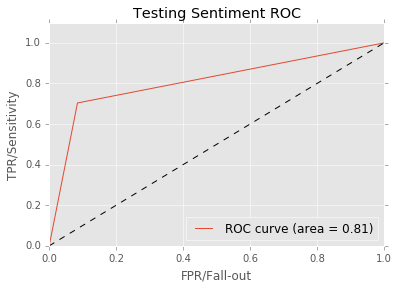

In [146]:
train_y_hat = model.predict(train_X_transformed)

fpr, tpr, thresholds = metrics.roc_curve(train_y, train_y_hat)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([.0, 1.])
plt.ylim([.0, 1.1])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title('Testing Sentiment ROC')
plt.legend(loc = 'lower right')
plt.show()

In [147]:
model.score(test_X_transformed, test_y)

0.75749999999999995

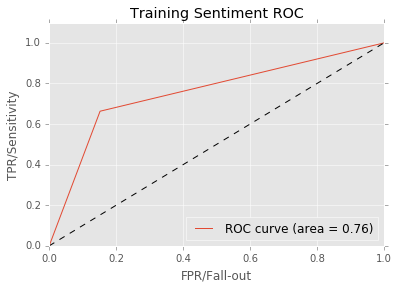

In [148]:
test_y_hat = model.predict(test_X_transformed)

fpr, tpr, thresholds = metrics.roc_curve(test_y, test_y_hat)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([.0, 1.])
plt.ylim([.0, 1.1])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title('Training Sentiment ROC')
plt.legend(loc = 'lower right')
plt.show()

In [150]:
importance=pd.DataFrame({'words': vectorizer.get_feature_names(), 'importance': model.feature_importances_})
importance[importance.importance>0].sort_values(by = 'importance').tail(20)

importance.count

<bound method DataFrame.count of       importance            words
0            0.0               10
1            0.0       10 minutes
2            0.0         10 saved
3            0.0        10 series
4            0.0               11
...          ...              ...
3294         0.0        years ago
3295         0.0       years best
3296         0.0    years carries
3297         0.0  years seriously
3298         0.0     years worked

[3299 rows x 2 columns]>

# Lab - TF-IDF

Directions: Redo the analysis above with `TfidfVectorizer` instead of `CountVectorizer`.  What do you get?

(Check http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html as needed)

In [35]:
vectorizer = feature_extraction.text.TfidfVectorizer(stop_words = 'english')

In [36]:
vectorizer.fit(train_X)

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [37]:
train_X_transformed = vectorizer.transform(train_X)

In [38]:
test_X_transformed = vectorizer.transform(test_X)

In [39]:
model = ensemble.RandomForestClassifier(n_estimators = 5)

cross_validation.cross_val_score(model, train_X_transformed, train_y, scoring = 'roc_auc')

array([ 0.76138839,  0.80253025,  0.73560315])

In [40]:
model.fit(train_X_transformed, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
model.score(train_X_transformed, train_y)

0.97833333333333339

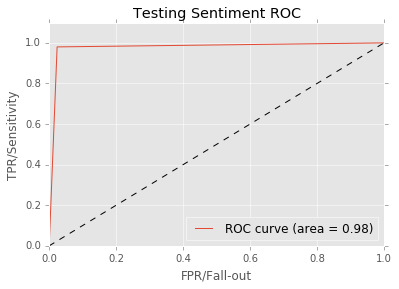

In [42]:
train_y_hat = model.predict(train_X_transformed)

fpr, tpr, thresholds = metrics.roc_curve(train_y, train_y_hat)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([.0, 1.])
plt.ylim([.0, 1.1])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title('Testing Sentiment ROC')
plt.legend(loc = 'lower right')
plt.show()

In [43]:
model.score(test_X_transformed, test_y)

0.73250000000000004

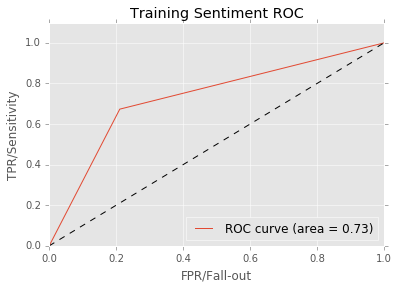

In [44]:
test_y_hat = model.predict(test_X_transformed)

fpr, tpr, thresholds = metrics.roc_curve(test_y, test_y_hat)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([.0, 1.])
plt.ylim([.0, 1.1])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title('Training Sentiment ROC')
plt.legend(loc = 'lower right')
plt.show()